In [3]:
!pip install prophet

In [14]:
import pandas as pd
df = pd.read_csv("mpesa_transactions.csv")

# For the timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format="%d-%m-%y %H:%M")
df['Month'] = df['Timestamp'].dt.to_period('M')
df['Day'] = df['Timestamp'].dt.date
df['Hour'] = df['Timestamp'].dt.hour

import matplotlib.pyplot as plt
import seaborn as sns


Index(['Day', 'y'], dtype='object')


In [27]:
# Forecasting Transactions in a day
transactions_per_day =df.groupby('Day').size().reset_index(name="y")
transactions_per_day.rename(columns = {'Day' : 'ds'}, inplace =True)
transactions_per_day.head()
print(transactions_per_day.columns)

Index(['ds', 'y'], dtype='object')


In [28]:
# Fitting the Model

from prophet import Prophet
model = Prophet()
model.fit(txn_per_day)

19:16:33 - cmdstanpy - INFO - Chain [1] start processing
19:16:33 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
# Making Future Predictions

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
forecast[['ds', 'yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
205,2025-07-25,54.718098,46.278350,64.048682
206,2025-07-26,56.586513,47.161273,66.573657
207,2025-07-27,53.848989,44.754941,63.368749
208,2025-07-28,54.204657,44.681334,63.709836
209,2025-07-29,56.703321,47.264614,65.301273


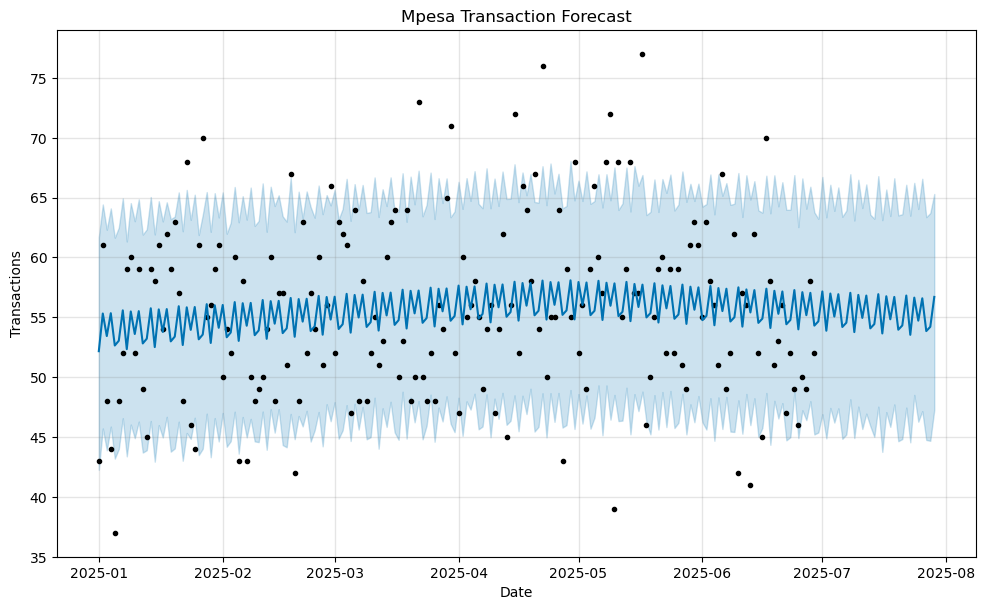

In [23]:
# Plotting the Forecast

model.plot(forecast)
plt.title('Mpesa Transaction Forecast')
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.grid(True)
plt.show()

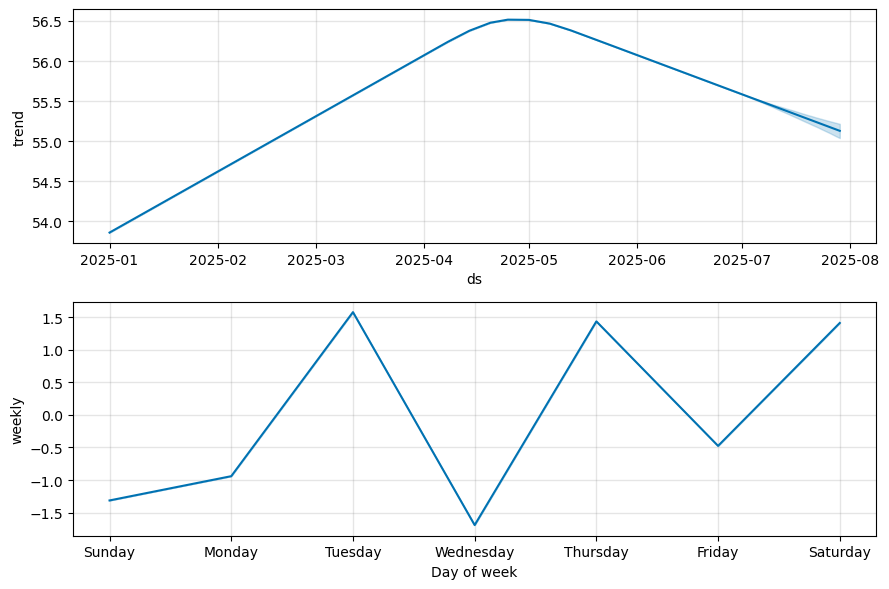

In [26]:
# Exploring Trends and Weekly Pattern

model.plot_components(forecast)
plt.show()

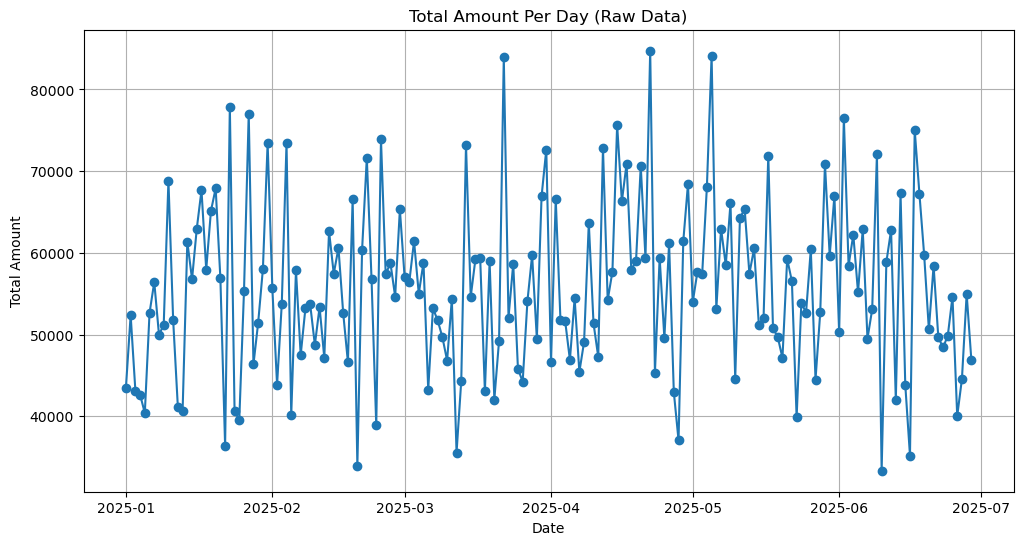

In [42]:
# Forecasting Total Amount Transacted in a Day

amount_per_day = df.groupby('Day')['Amount'].sum().reset_index(name='y')
amount_per_day.rename(columns ={'Day': 'ds'} ,inplace=True) 
amount_per_day['ds'] = pd.to_datetime(amount_per_day['ds'])
amount_per_day.dropna(inplace=True)

# Prophet was not visualizing as I wanted thus went back to basics for a bit

# amount_model = Prophet()
# amount_model.fit(amount_per_day)
# future_amt = amount_model.make_future_dataframe(periods = 30)
# forecast_amt = amount_model.predict(future_amt)

plt.figure(figsize=(12,6))
plt.plot(amount_per_day['ds'], amount_per_day['y'], marker='o')
plt.title("Total Amount Per Day (Raw Data)")
plt.xlabel("Date")
plt.ylabel("Total Amount")
plt.grid(True)
plt.show()

In [39]:
amount_per_day.head(10)
amount_per_day.tail(10)
print(amount_per_day.dtypes)
print(amount_per_day.isna().sum())


ds    datetime64[ns]
y            float64
dtype: object
ds    0
y     0
dtype: int64


19:44:43 - cmdstanpy - INFO - Chain [1] start processing
19:44:43 - cmdstanpy - INFO - Chain [1] done processing


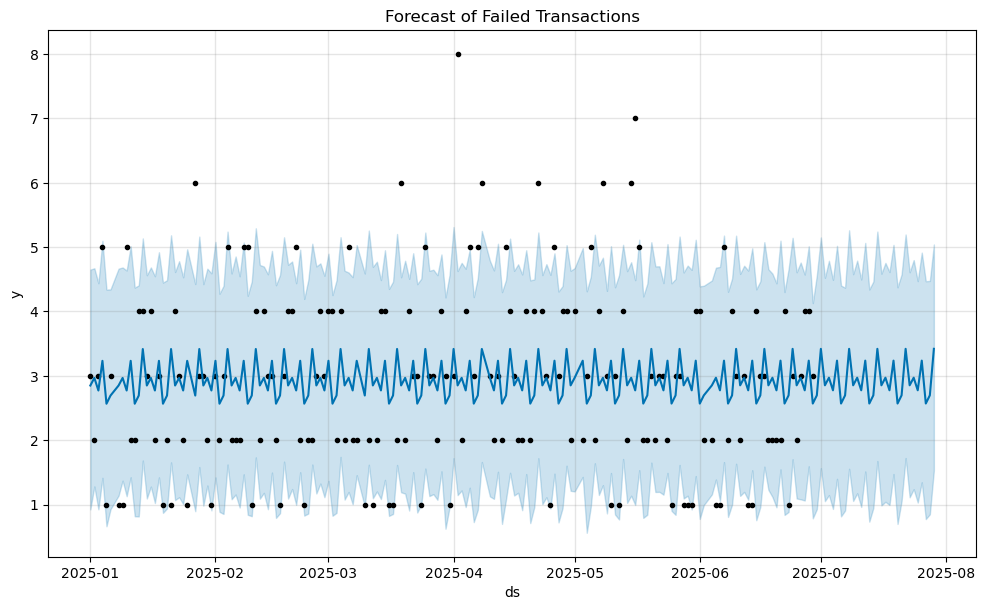

In [46]:
# Forecasting Failed Transactions in a Day

failed = df[df['Status'] =='Failed']
failed_per_day = failed.groupby('Day').size().reset_index(name='y')
failed_per_day.rename(columns ={'Day': 'ds'} ,inplace=True) 
failed_per_day['ds'] = pd.to_datetime(failed_per_day['ds'])
failed_per_day.dropna(inplace=True)
fail_model = Prophet()
fail_model.fit(failed_per_day)
future_fail = fail_model.make_future_dataframe(periods = 30)
forecast_fail = fail_model.predict(future_fail)
fail_model.plot(forecast_fail)
plt.title('Forecast of Failed Transactions')
plt.show()

19:54:32 - cmdstanpy - INFO - Chain [1] start processing
19:54:32 - cmdstanpy - INFO - Chain [1] done processing


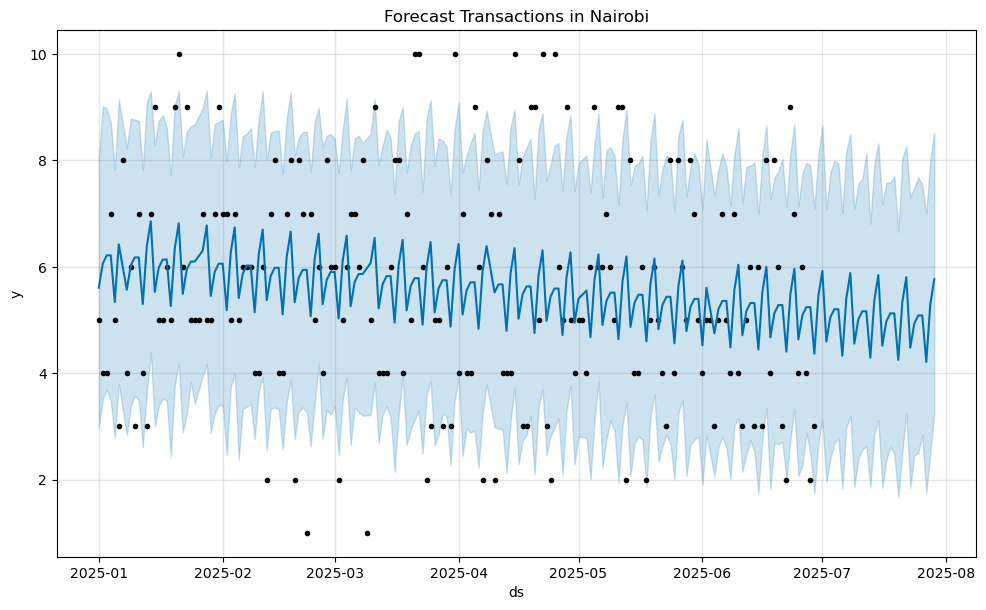

In [49]:
# User Activity by Location

# Nairobi

nairobi_df = df[df['Location'] =='Nairobi']
nairobi_daily = nairobi_df.groupby('Day').size().reset_index(name='y')
nairobi_daily.rename(columns ={'Day': 'ds'} ,inplace=True) 
nairobi_daily['ds'] = pd.to_datetime(nairobi_daily['ds'])
nairobi_daily.dropna(inplace=True)

nairobi_model = Prophet()
nairobi_model.fit(nairobi_daily)
nairobi_future = nairobi_model.make_future_dataframe(periods = 30)
nairobi_forecast = nairobi_model.predict(future_fail)
nairobi_model.plot(nairobi_forecast)
plt.title('Forecast Transactions in Nairobi')
plt.show()